# **Лекция 8: больше графиков и больше численного анализа**

## **План лекции**

- Обсуждение плана лекции и организационных вопросов
- Еррорбары
- Логарифмическая шкала
- Барплоты (столбчатые диаграммы)
- Гистограммы
- Булевые маски в `numpy`
- Продвинутое индексирование массивов в `numpy`

Импортируем большинство нужных библиотек:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Еррорбары

В большом количестве случаев данные приводятся с ошибкой измерения. Хорошим тоном является эту ошибку визуализировать! Давайте возьмем данные и нарисуем еррорбары. Синтаксис:

- `plt.errorbar(x, y, yerr=yerr)`:
    - `x`, `y`: данные к которым мы должны пририсовать еррорбары
    - `yerr`: значения ошибок измерений второго параметра
    - `marker=` дополнительный аргумент: стиль отображения точечек на графике
    - `linestyle='none'` дополнительный аргумент: позволяет не рисовать линию между точками, в большинстве случаев это линия и не нужна и только мешает
    - `capsize=` дополнительный аргумент: позволяет добавить засечки на краях еррорбаров

Возьмем предыдущий датасет с лабораторной работой и посмотрим на `plt.errorbar` без дополнительных аргументов:

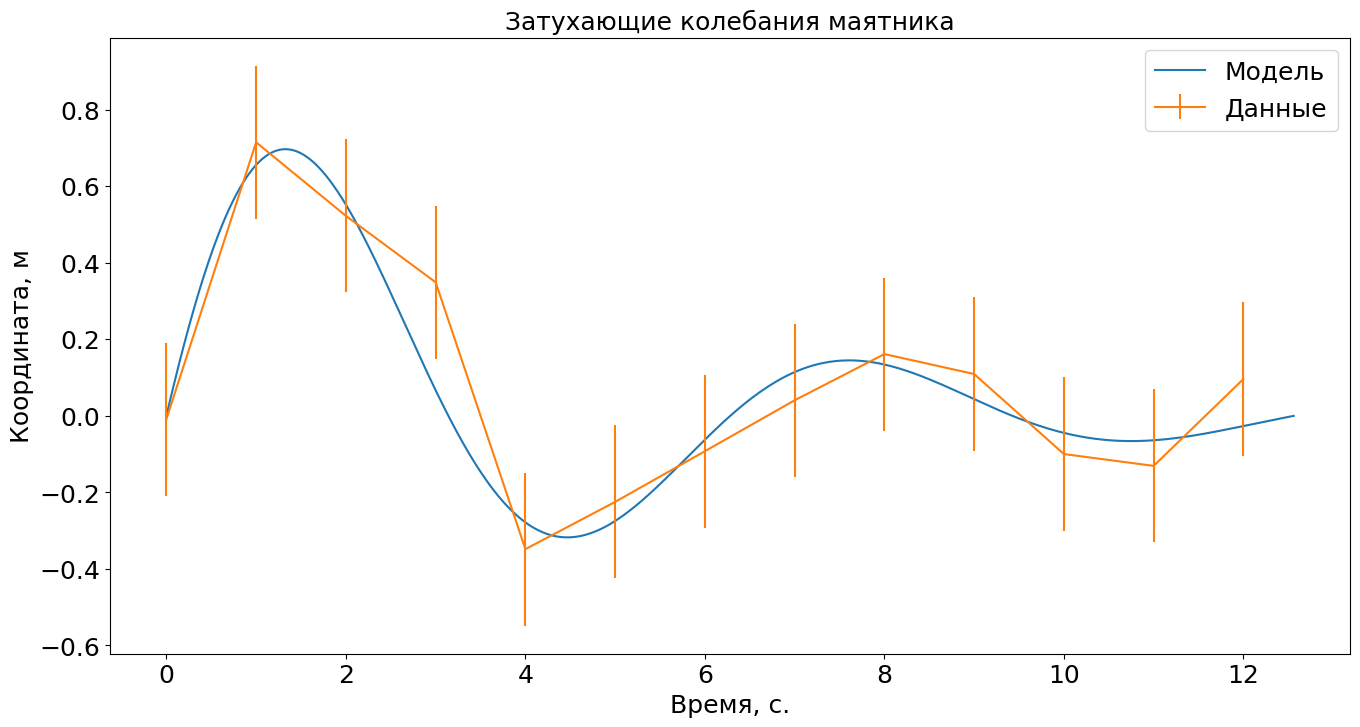

In [239]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

sigma = 0.1
y1 = y + sigma*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.errorbar(x[::100], y1[::100], yerr=2*sigma) # возьмем размер ошибки как два сигма

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

Теперь с дополнительными аргументами:

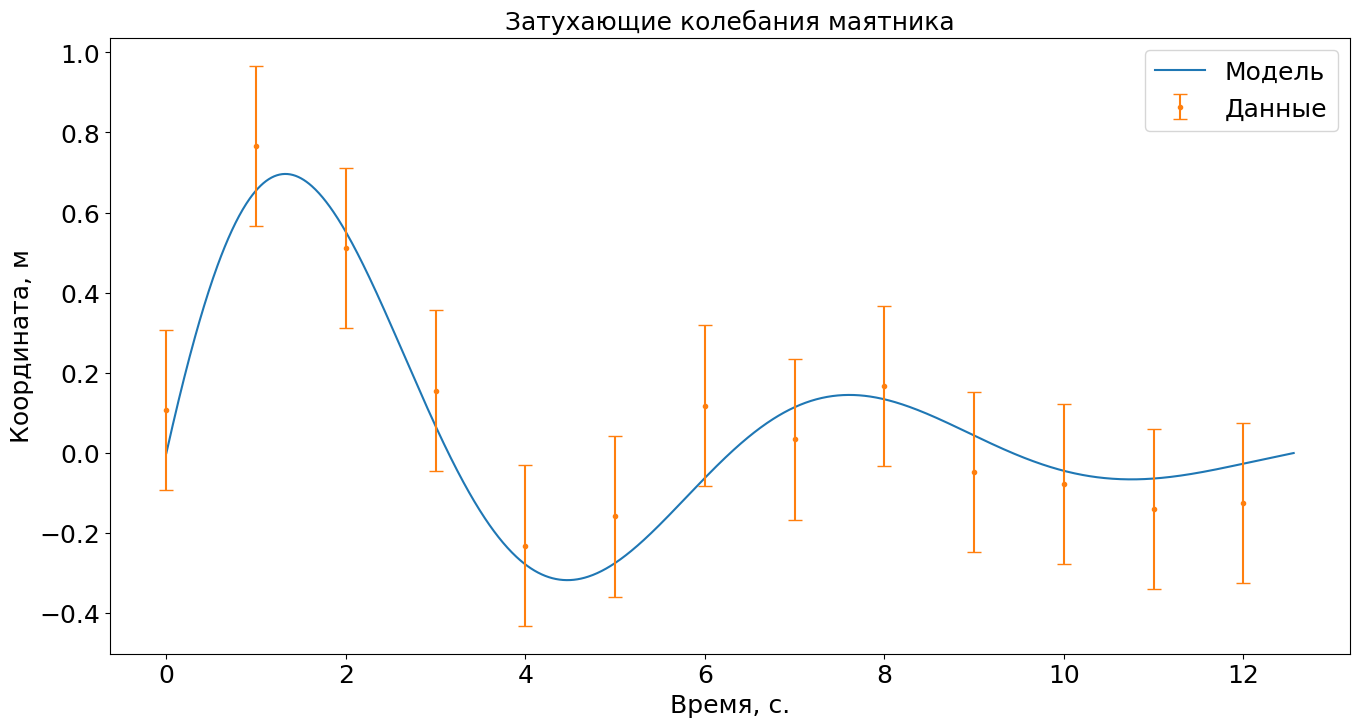

In [20]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

sigma = 0.1
y1 = y + sigma*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.errorbar(x[::100], y1[::100], yerr=2*sigma, marker='.', linestyle='none', capsize=5)

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

## Более крутой стиль еррорбаров

А что если мы бы хотели нарисовать еррорбар вокруг модели? Можно сохранить стиль еррорбаров:

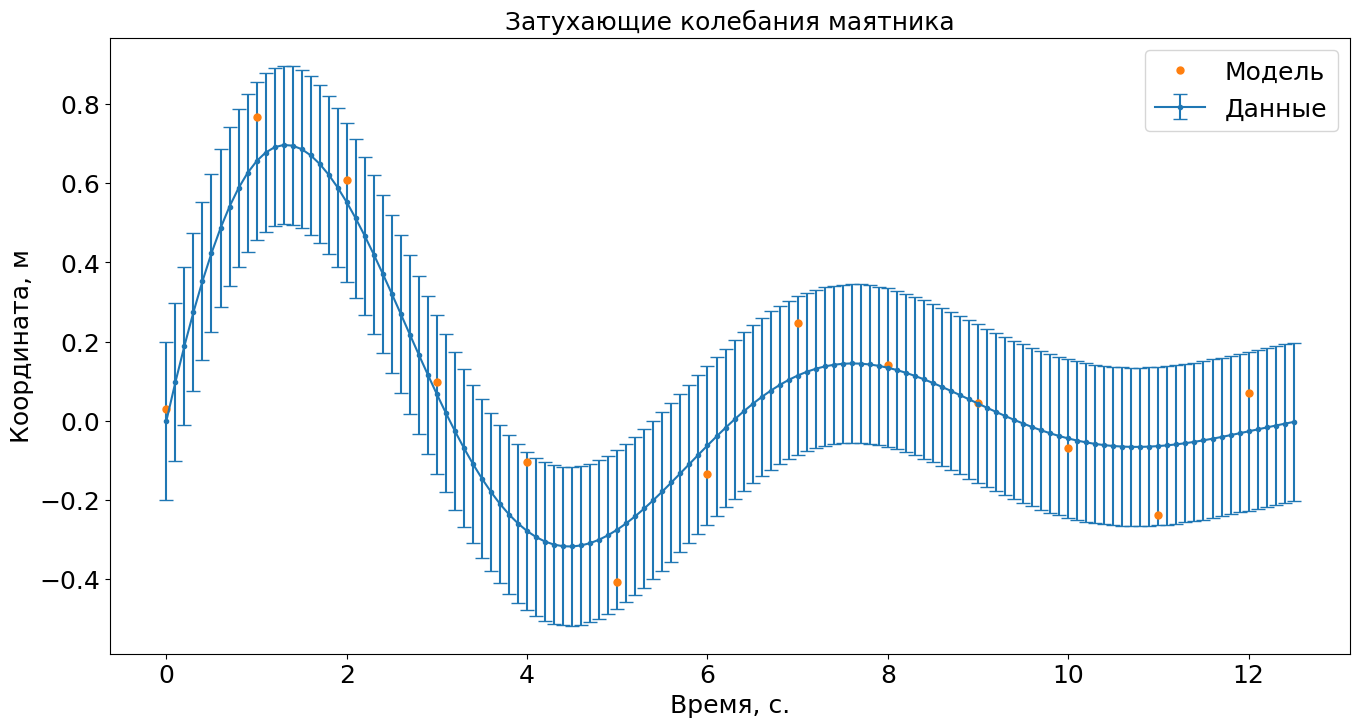

In [41]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

sigma = 0.1
y1 = y + sigma*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.errorbar(x[::10], y[::10], yerr=2*sigma, marker='.', capsize=5)
plt.plot(x[::100], y1[::100], '.', markersize=10)

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Модель', 'Данные'], fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

Не очень красиво, да? Для такого можно применить `plt.fill_between`. Синтаксис:
 - `plt.fill_between(x, y1=y1, y2=y2)`:
     - `y1`: верхняя граница заполнения графика
     - `y2`: нижняя граница заполнения графика
     
Посмотрим на пример:

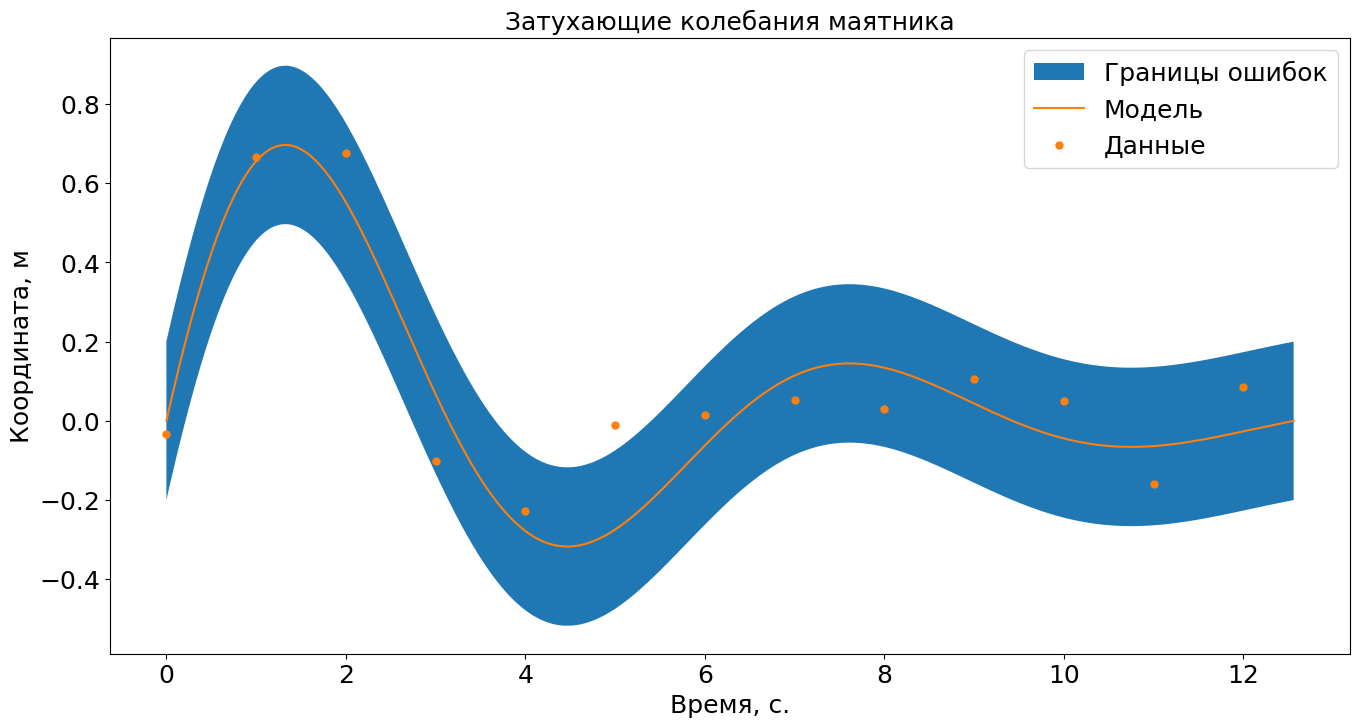

In [45]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

sigma = 0.1
y1 = y + sigma*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.fill_between(x, y1=y-2*sigma, y2=y+2*sigma)
plt.plot(x, y, color='C1')
plt.plot(x[::100], y1[::100], '.', markersize=10, color='C1')

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Границы ошибок', 'Модель', 'Данные'], fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

В целом неплохо, но кажется не очень органично. Попробуем исправить добавив прозрачности:

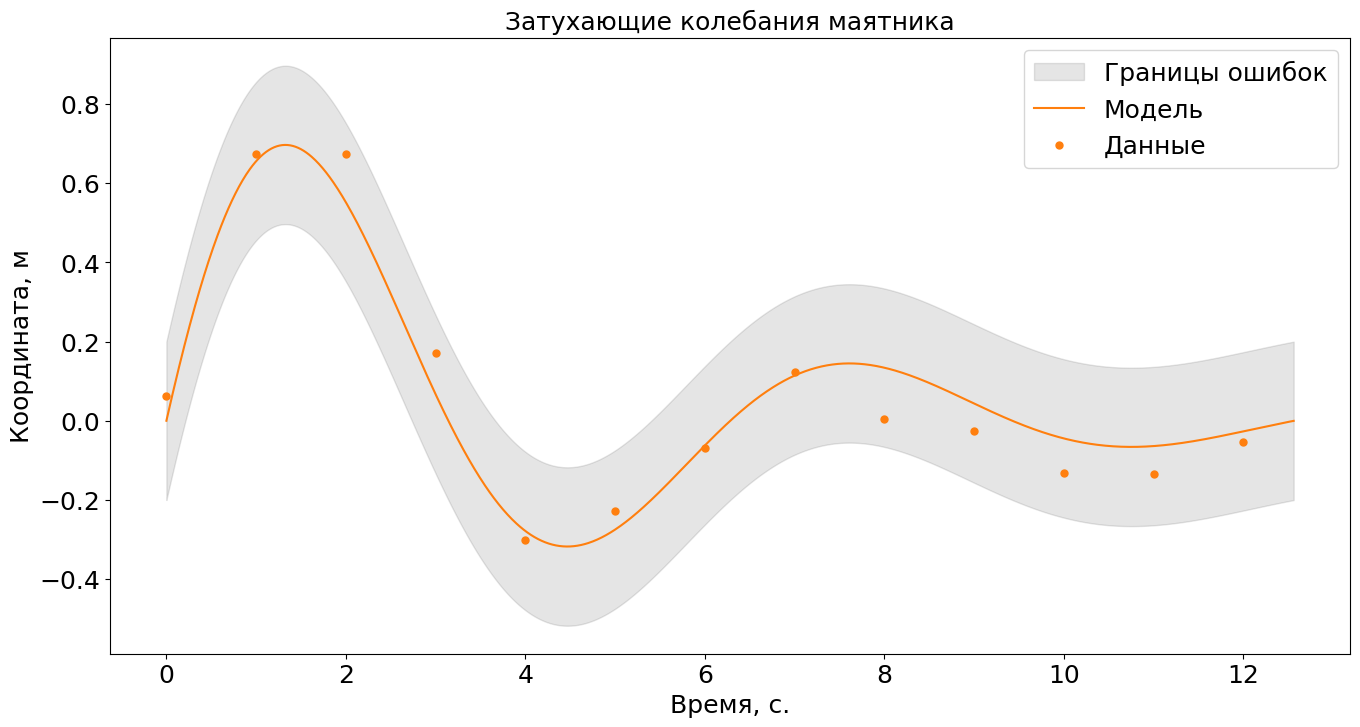

In [52]:
x = np.arange(0, 4*np.pi, 0.01)
y = np.sin(x)*np.exp(-x/4)

sigma = 0.1
y1 = y + sigma*np.random.randn(len(y)) # добавляем шум

plt.figure(figsize=(16,8))
plt.fill_between(x, y1=y-2*sigma, y2=y+2*sigma, alpha=0.1, color='black')
plt.plot(x, y, color='C1')
plt.plot(x[::100], y1[::100], '.', markersize=10, color='C1')

plt.title('Затухающие колебания маятника', fontsize=18) 
plt.ylabel('Координата, м', fontsize=18)     
plt.xlabel('Время, с.',fontsize=18)           
plt.legend(['Границы ошибок', 'Модель', 'Данные'], fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

<p>
<details>
<summary> ✨ ⬇️ <u> Еще немного про прозрачность </u> </summary>

Если на вашем графике много еррорбаров и они сливаются, очень удобно повышать прозрачность. Посмотрим пример:
```python
data = np.loadtxt('data/temps.txt')

year = data[:, 0]
month = data[:, 1]
temperature = data[:, 2]
uncertainty = data[:, 3]

plt.figure(figsize=(16,8))
plt.errorbar(year+month/12, temperature, yerr=uncertainty, linestyle='none', capsize=5, alpha=0.2)

plt.ylabel('Температура, $^\circ$C', fontsize=18)     
plt.xlabel('Время, год',fontsize=18)           
plt.gca().tick_params(labelsize=18) 
plt.show()
```
Получается следующая картинка:
![](figures/temps_example.png)    

</details>
</p>

<p>
<details>
<summary> ✨✨ ⬇️ <u> Еще немного про то же самое, но более сложно </u> </summary>

Можно усреднить данные и построить график с ошибкой. Строго говоря, это плохой датасет для этого примера: ошибка не отражает пространственный разброс температуры, а данные только по одному графику. Но как иллюстрация метода такое подойдет! Здесь использовано усреднение [скользящим средним](https://en.wikipedia.org/wiki/Moving_average) (сделанное через свертку, просто поверьте что это то же самое):
```python
data = np.loadtxt('data/temps.txt')

year = data[:, 0]
month = data[:, 1]
temperature = data[:, 2]
uncertainty = data[:, 3]
time = year+month/12

window = 15
temperature_averaged = np.convolve(temperature, np.ones(window), mode='same')/np.ones(window).sum()
uncertainty_averaged = np.convolve(uncertainty, np.ones(window), mode='same')/np.ones(window).sum()

plt.figure(figsize=(16,8))
plt.fill_between(time,
                 y1=temperature_averaged-uncertainty_averaged,
                 y2=temperature_averaged+uncertainty_averaged, alpha=0.1, color='black')

plt.plot(time, temperature, '.', alpha=0.2)
plt.plot(time, temperature_averaged)

plt.ylabel('Температура, $^\circ$C', fontsize=18)     
plt.xlabel('Время, год',fontsize=18)  

plt.legend(['Границы ошибок', 'Данные',
            'Температура (усредненная с окном в 15 месяцев)'],
            fontsize=18)

plt.gca().tick_params(labelsize=18) 
```
Получается следующая картинка:
![](figures/temps_example2.png)    

</details>
</p>

## Логарифмическая шкала

Что если наши данные имеют очень сильный разброс значений? Например, построим оценочную популяцию Земли от года (отрицательные годы представляют годы до н.э., [данные усреднены по нескольким оценкам и разным работам](https://datahub.io/core/population-global-historical)):

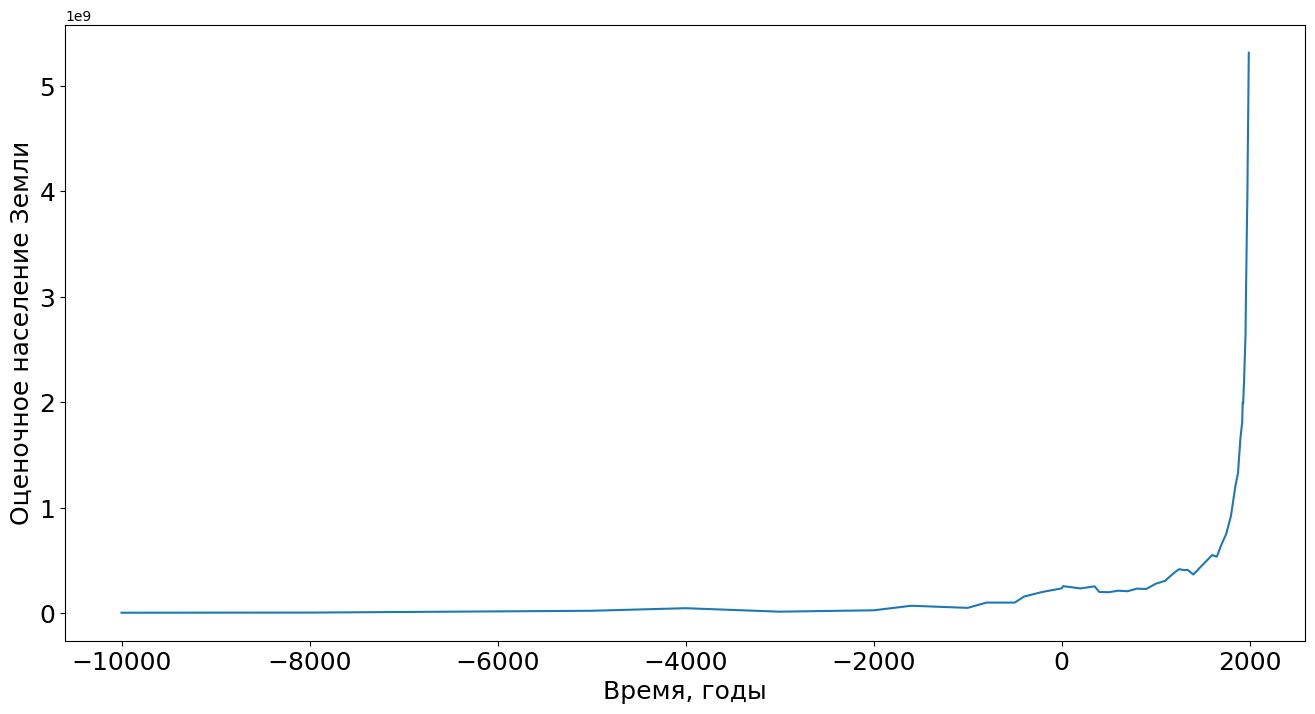

In [244]:
year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000*1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.plot(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

На этом графике для нас население Земли до 4000 года до н.э. представляет просто прямую линию. Что если мы хотим как-то сохранить информацию об этом на графике? Давайте построим ось `y` в логарифмическом масштабе:

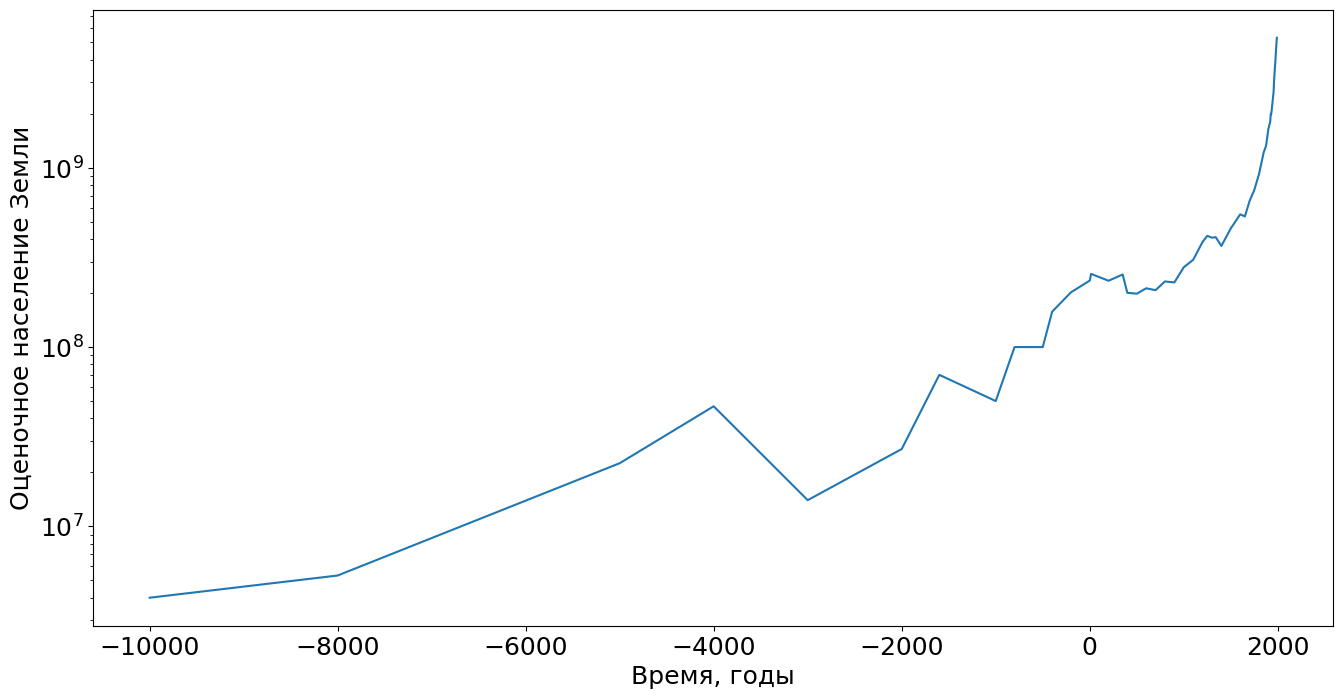

In [245]:
year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000*1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.semilogy(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

<p>
<details>
<summary> ✨ ⬇️ <u> Мне не нравится такой стиль подписи цифр на осях (10^4 или 10^7). Что можно сделать? </u> </summary>

Есть специальная функция, которая позволяет изменять формат вывода числа которым подписывается засечка в графике (`tick`). Полный список приколов с этим классом функций можно посмотреть здесь, а здесь для нас важно, что мы можем следующей (сложной) конструкцией:
```python
from matplotlib import ticker

year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.semilogy(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы', fontsize=18) 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}")) # вся магия вот здесь
plt.gca().tick_params(labelsize=18) 
```
Здесь важно то, что стоит в выражении `x:.0f` после двоеточия. Это формат вывода цифры, как в [форматированном выводе](https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points)

    
Получается следующая картинка:
![](figures/tick_formatter_example.png)    

</details>
</p>

## Барплоты

Иногда используется следующий стиль визуализации данных: 

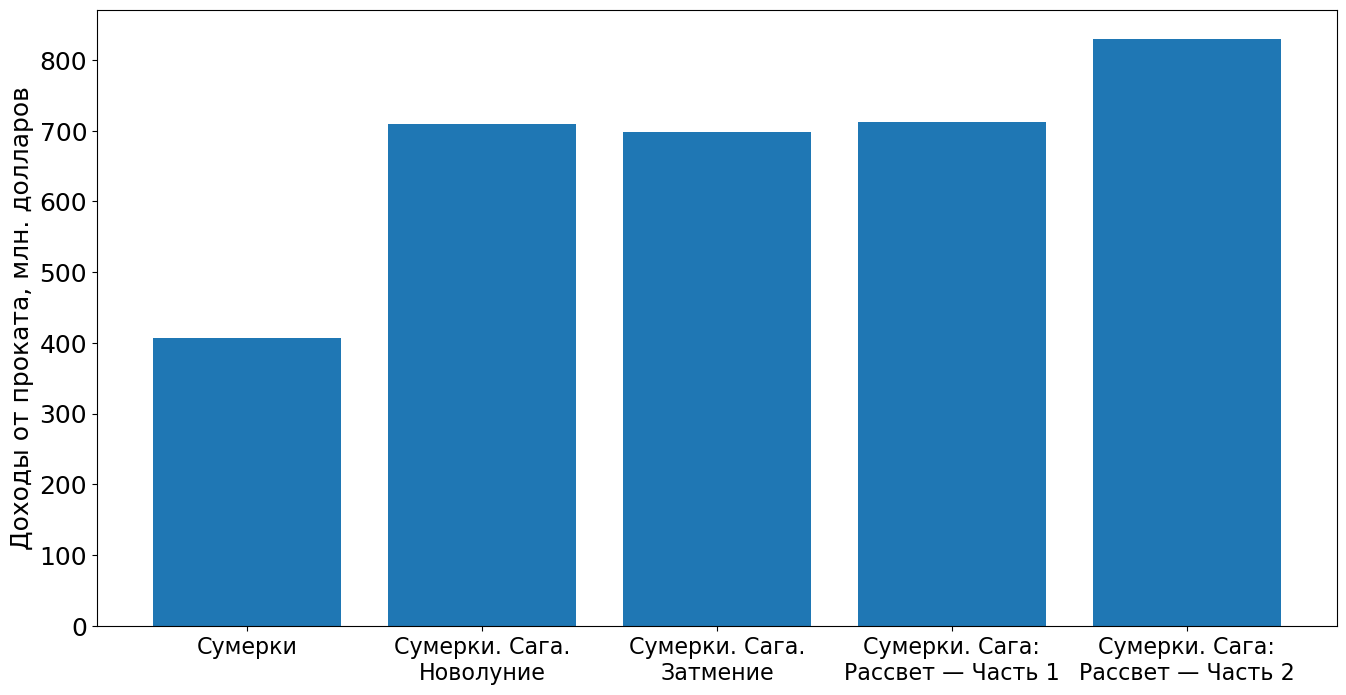

In [152]:
twilight_saga = ['Сумерки', 'Сумерки. Сага.\nНоволуние', 'Сумерки. Сага.\nЗатмение', 
                 'Сумерки. Сага:\nРассвет — Часть 1', 'Сумерки. Сага:\nРассвет — Часть 2']
revenue_box_office = np.array([407187715, 709711008, 698491347, 712205856, 829746820])

plt.figure(figsize=(16,8))
plt.bar(twilight_saga, revenue_box_office/10**6)
plt.ylabel('Доходы от проката, млн. долларов', fontsize=18)    
plt.gca().tick_params(axis='x', labelsize=16) 
plt.gca().tick_params(axis='y', labelsize=18) 


<p>
<details>
<summary> ✨✨ ⬇️ <u> Многослойные барплоты </u> </summary>

Можно создавать вот такое колдунство (код без объясенений):
    
```python
import pandas as pd

moscow_thermal_stress = pd.read_csv('data/thermal_stress_dataset.csv')

plt.figure(figsize=(16,9))
ax = plt.gca()

bottom = np.zeros(40)
all_stresses = ['extreme cold stress', 'strong cold stress',
       'moderate cold stress', 'slight cold stress', 'no thermal stress',
       'slight heat stress', 'moderate heat stress', 'strong heat stress',
       'extreme heat stress']
for counter, stress in enumerate(all_stresses):

    mask_stress = moscow_thermal_stress['Thermal_stress']==stress
    
    # Здесь важно то, что мы задаем то что находится внизу под барплотом (bottom=)
    # То есть как бы стакаем барплоты друг на друга
    ax.bar(moscow_thermal_stress[mask_stress]['Year'], moscow_thermal_stress[mask_stress]['size'], 
        label=stress, bottom=bottom, color=plt.get_cmap("Set3")(counter))
    bottom += moscow_thermal_stress[mask_stress]['size'].values

# Вот так можно вынести легенду за рамки графика:
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=16) 
plt.gca().tick_params(labelsize=18) 
plt.title('Москва', fontsize=24)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество дней', fontsize=20)

plt.xlim([1978.5, 2018.5])

```
Получается вот такая панелька:
    
![](figures/thermal_stress_moscow.png)

</details>
</p>

## Гистограммы

На самом деле, гистограммы являются частным случаем барплотов! Скажем, у нас есть датасет случайно сгенрированных величин распредленных нормально. Как нам проверить, действительно ли они распредлены нормально?

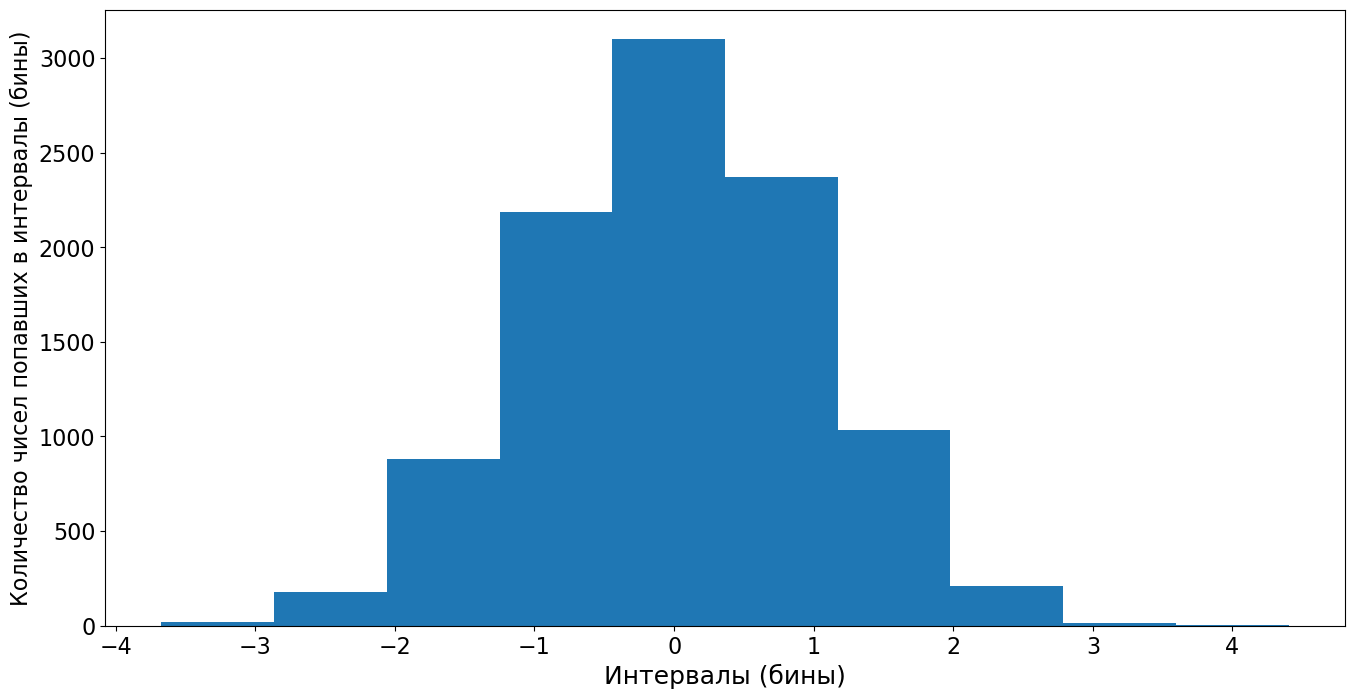

In [170]:
np.random.seed(2024) # зафиксируем числа
normal_dataset = np.random.randn(10000) # 10000 величин распредленных нормальным распредлением
                                      # mu = 0, sigma = 1
plt.figure(figsize=(16,8))
plt.hist(normal_dataset)
plt.xlabel('Интервалы (бины)', fontsize=18)  
plt.ylabel('Количество чисел попавших в интервалы (бины)', fontsize=16)  
plt.gca().tick_params(labelsize=16) 

Что мы сделали? 
- Разделили наш датасет на 10 равных интервалов (бинов) от минимального до максимального числа
- Посчитали количество значений лежащих в этих бинах
- Построили барплот, где по оси `x` отложили получившиеся интервалы, а по оси `y` - значения получившиеся в этих бинах 

Посмотрим, что получится если мы нарисуем то же самое, но с большим количеством бинов:

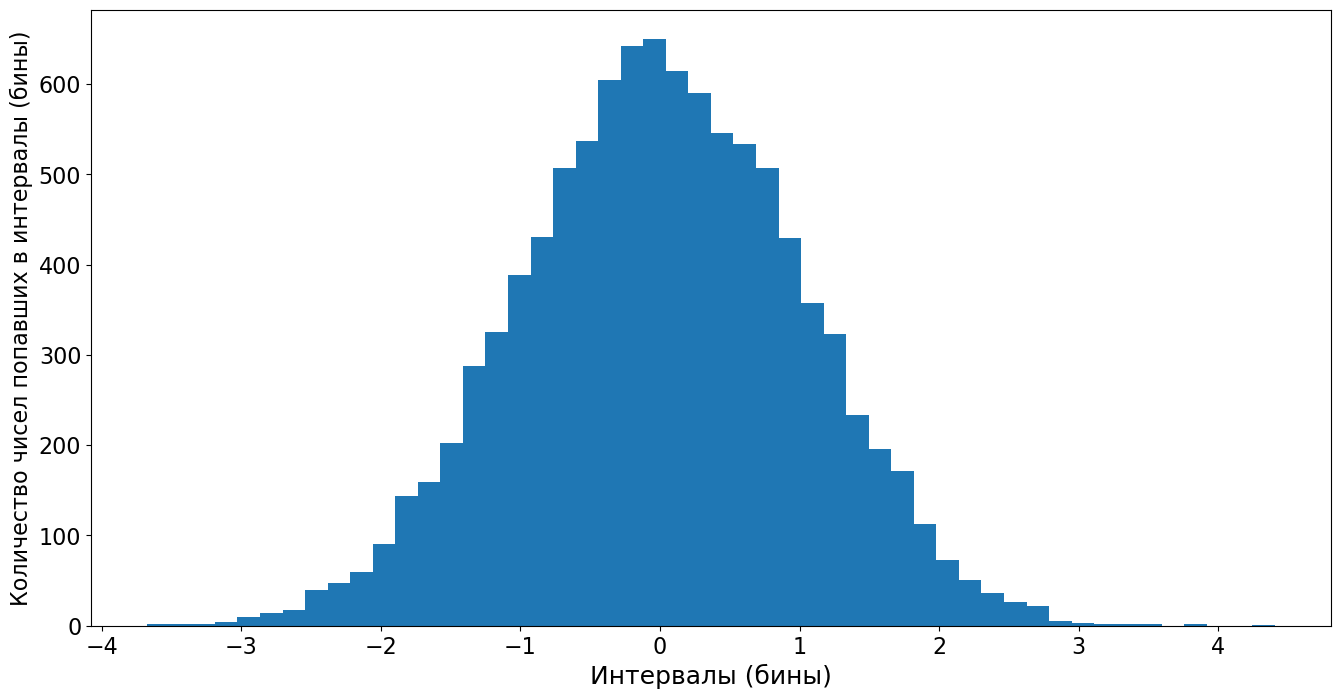

In [247]:
np.random.seed(2024) # используем то же зерно
normal_dataset = np.random.randn(10000) # 10000 величин распредленных нормальным распредлением
                                      # mu = 0, sigma = 1
plt.figure(figsize=(16,8))
plt.hist(normal_dataset, bins=50)
plt.xlabel('Интервалы (бины)', fontsize=18)  
plt.ylabel('Количество чисел попавших в интервалы (бины)', fontsize=16)  
plt.gca().tick_params(labelsize=16) 

Приколы:
- Если написать `n, bins = plt.hist(normal_dataset, bins=50)`, то можно получить значения из этой гистограммы
- С помощью аргумента `range=` можно контроллировать начиная с какого и заканчивая каким значением мы рисуем гистограмму
- Аргумент `density=` позволяет отображать по оси `y` не количество значений в бине, а процент от общего числа

## Булевые маски в `numpy`

Одна из самых полезных фич `numpy` (и других библиотек для работы с численными данными), это индексирование массивов с помощью булевых масок. Что это такое?

Для любого массива мы можем написать поэлементное сравнение, например:

In [279]:
x = np.linspace(1, 10, 10)
mask = x < 5
for element, masked_element in zip(x, mask):
    print(f'Значение элемента: {element} и маски: {masked_element}')

Значение элемента: 1.0 и маски: True
Значение элемента: 2.0 и маски: True
Значение элемента: 3.0 и маски: True
Значение элемента: 4.0 и маски: True
Значение элемента: 5.0 и маски: False
Значение элемента: 6.0 и маски: False
Значение элемента: 7.0 и маски: False
Значение элемента: 8.0 и маски: False
Значение элемента: 9.0 и маски: False
Значение элемента: 10.0 и маски: False


Поставив эту маску в качестве в квадратные скобочки (как мы делаем для индексов), мы можем получить только элементы для которых этот элемент равен `True`:

In [280]:
x = np.linspace(1, 10, 10)
mask = x < 5

print('Массив x:')
print(x)
print('Массив x[x<5]:')
print(x[mask])

Массив x:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Массив x[x<5]:
[1. 2. 3. 4.]


Самое главное, что эта маска может применяться не только для самого массива, но и для других тоже. Например:

In [253]:
x = np.linspace(1, 10, 10)
x_squared = x**2

mask = x > 5

print('Массив x_squared:')
print(x_squared)
print('Массив x[x>5]:')
print(x[mask])
print('Массив x_squared[x>5]:')
print(x_squared[mask])

Массив x_squared:
[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
Массив x[x>5]:
[ 6.  7.  8.  9. 10.]
Массив x_squared[x>5]:
[ 36.  49.  64.  81. 100.]


Казалось бы, не очень полезная информация. Более того, казалось бы, мы ведь говорили про графики, как это к нам относится? Посмотрим на следующий пример:

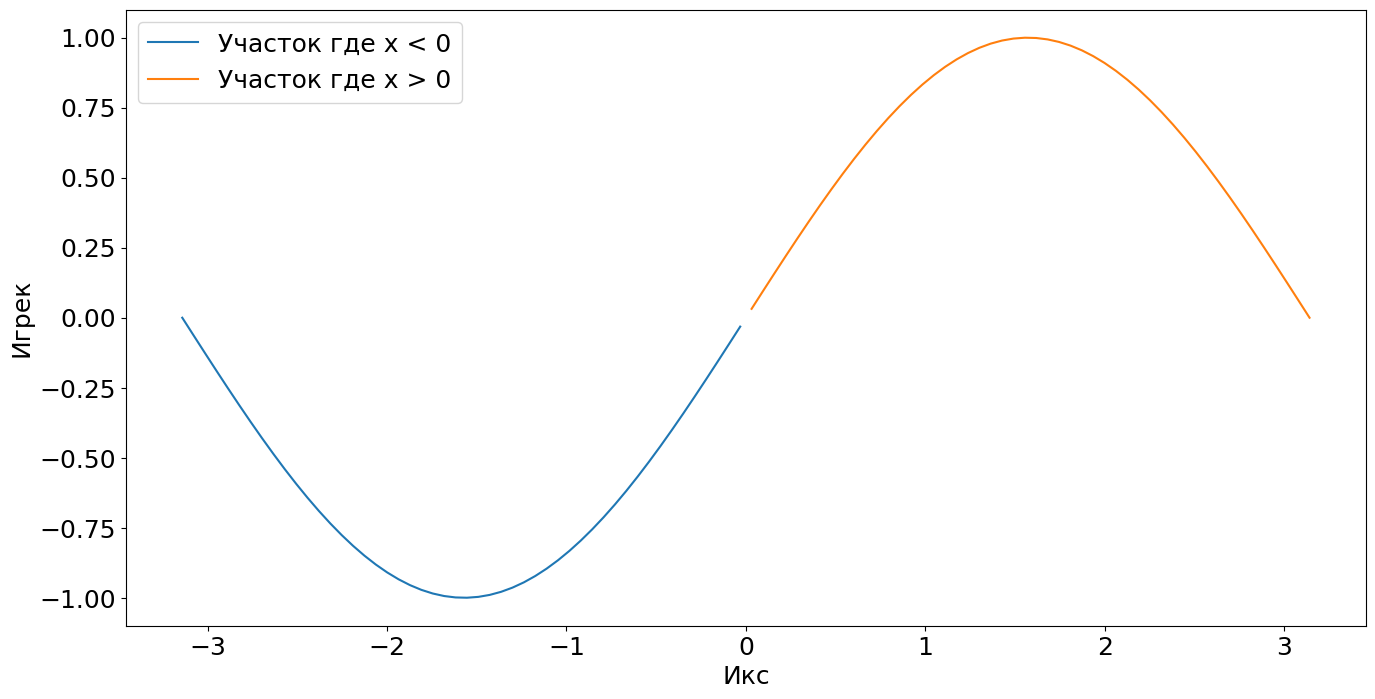

In [256]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

mask_less_0 = x <= 0
mask_more_0 = x >= 0

plt.figure(figsize=(16,8))
plt.plot(x[mask_less_0], y[mask_less_0], label='Участок где x < 0')
plt.plot(x[mask_more_0], y[mask_more_0], label='Участок где x > 0')

plt.ylabel('Игрек', fontsize=18)     
plt.xlabel('Икс',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

<p>
<details>
<summary> ⬇️ <u> Как сделать чтобы не было дырки по середине? </u> </summary>

Дырка происходит потому, что у нас есть крайние точки отрезков, которые как бы и не должны соединяться друг с другом. Две точки, которая одна чуть меньше нуля, другая чуть больше, а между точек нет, а значит и закрашивать нечем. Проще всего строить такие участки просто один поверх другого, так как данные идеально совпадают, нужная нам линия просто закрасит то что снизу:
```python
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

mask_more_0 = x >= 0

plt.figure(figsize=(16,8))
plt.plot(x, y, label='Участок где x < 0')
plt.plot(x[mask_more_0], y[mask_more_0], label='Участок где x > 0')

plt.ylabel('Игрек', fontsize=18)     
plt.xlabel('Икс',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 
```

</details>
</p>

Посмотрим на более релевантный пример:

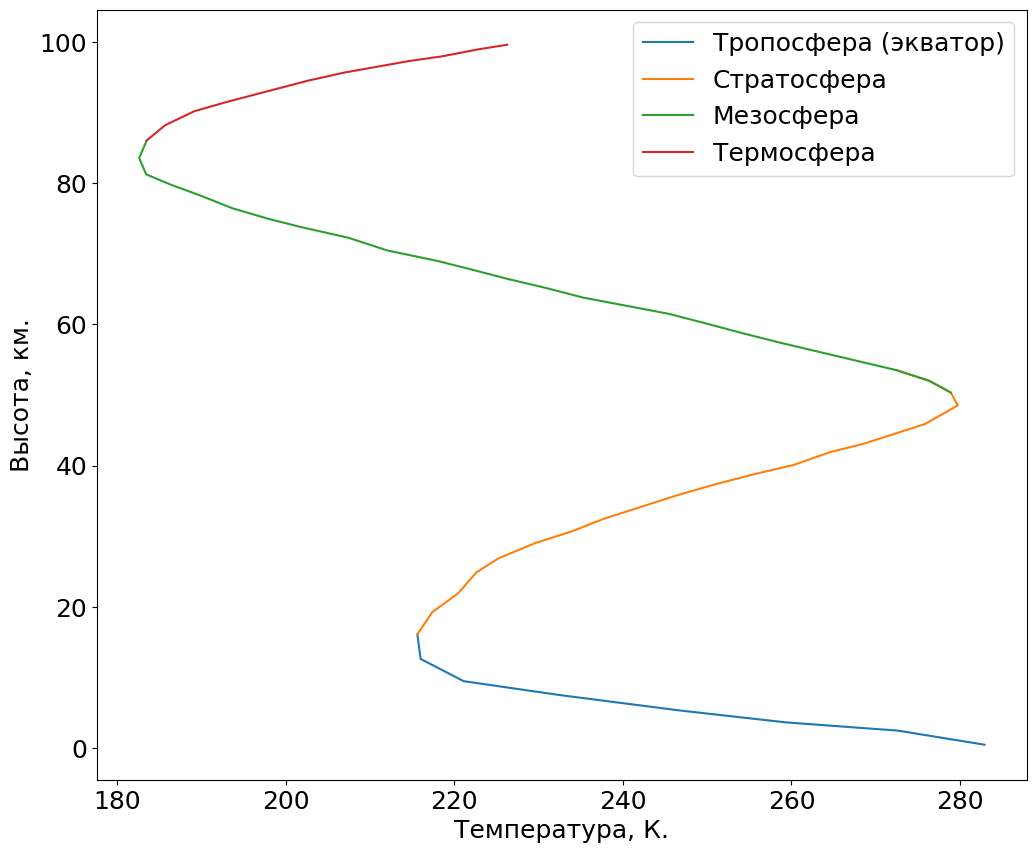

In [259]:
temperature, altitude = np.loadtxt('data/temp_profile.csv', unpack=True, delimiter=',')

mask_troposphere = altitude < 18 # созднательно выделил верхние границы повыше чтобы не было дырок
mask_stratosphere = (altitude > 15) & (altitude < 54)
mask_mesosphere = (altitude > 50) & (altitude < 87)
mask_thermosphere = (altitude > 85)

plt.figure(figsize=(12,10))
plt.plot(temperature[mask_troposphere], altitude[mask_troposphere], label='Тропосфера (экватор)')
plt.plot(temperature[mask_stratosphere], altitude[mask_stratosphere], label='Стратосфера')
plt.plot(temperature[mask_mesosphere], altitude[mask_mesosphere], label='Мезосфера')
plt.plot(temperature[mask_thermosphere], altitude[mask_thermosphere], label='Термосфера')

plt.ylabel('Высота, км.', fontsize=18)     
plt.xlabel('Температура, К.',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 

Очевидно, что мы можем делать селекцию данных по любому критерию, главное чтобы у нас по итогу получалась маска с `True` и `False` (`boolean mask`). Например, у нас есть сет данных `Sentinel` высокого разрешения но с узкоугольным покрытием. У нас есть координаты центров этих изображений:

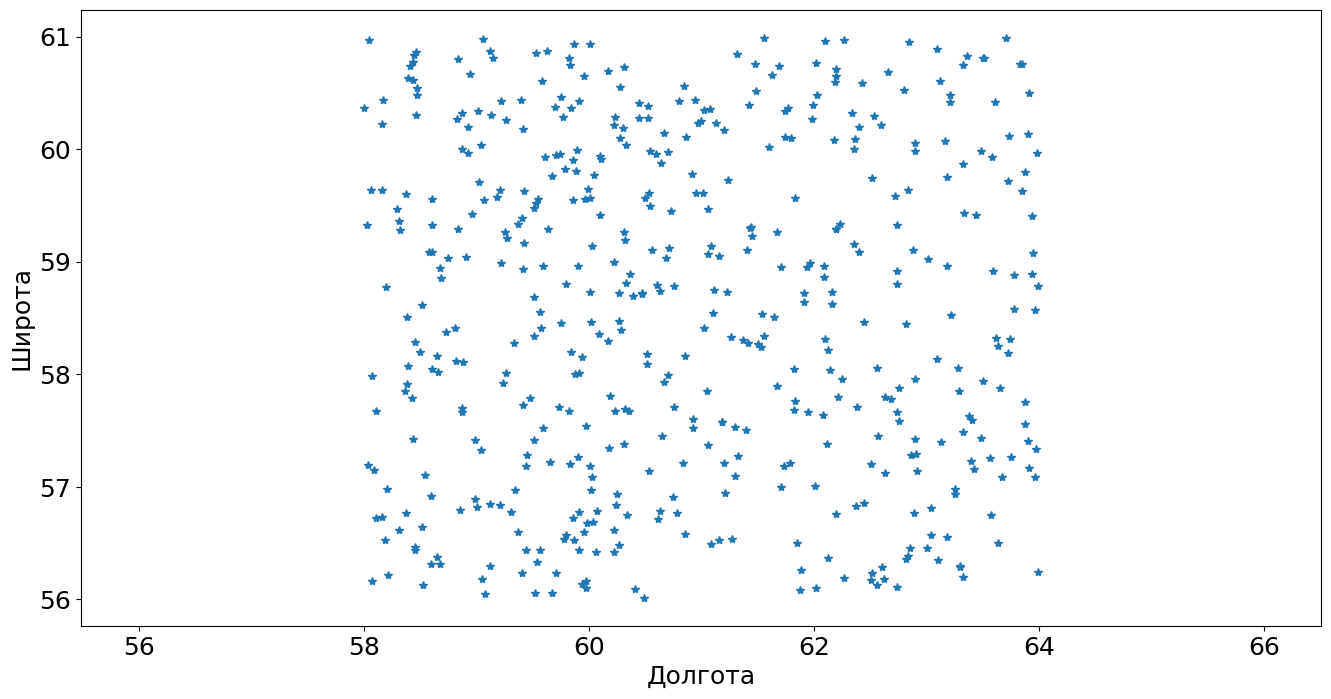

In [262]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

Допустим, нам нужно найти только наблюдения радиусом в один градус вокруг `(60.6, 58.8)`:

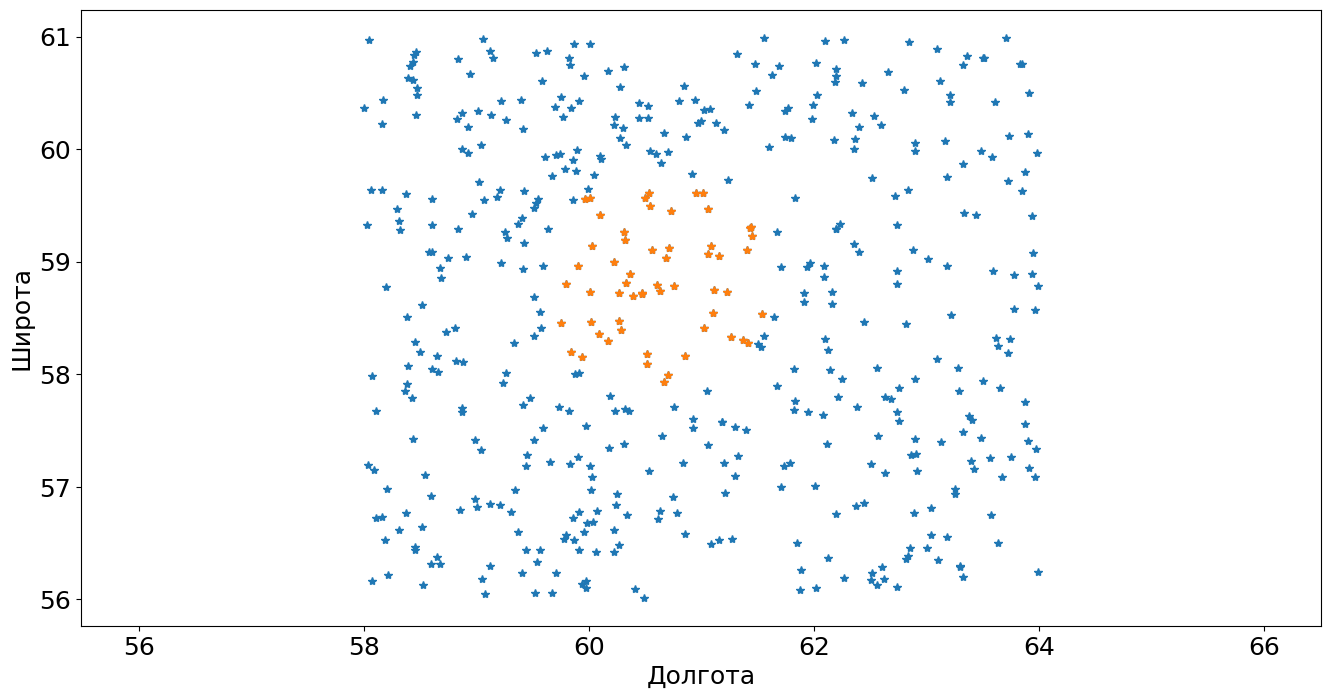

In [263]:
mask = np.sqrt((lat - 58.8)**2 + (lon - 60.6)**2) < 1

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask], lat[mask], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

### Что если нам нужны два условия одновременно? 

Просто нужно найти поэлементное `И` для двух масок. Это делается с помощью оператора `&`.  Давайте выделим, например, долготу от `60` до `62`:

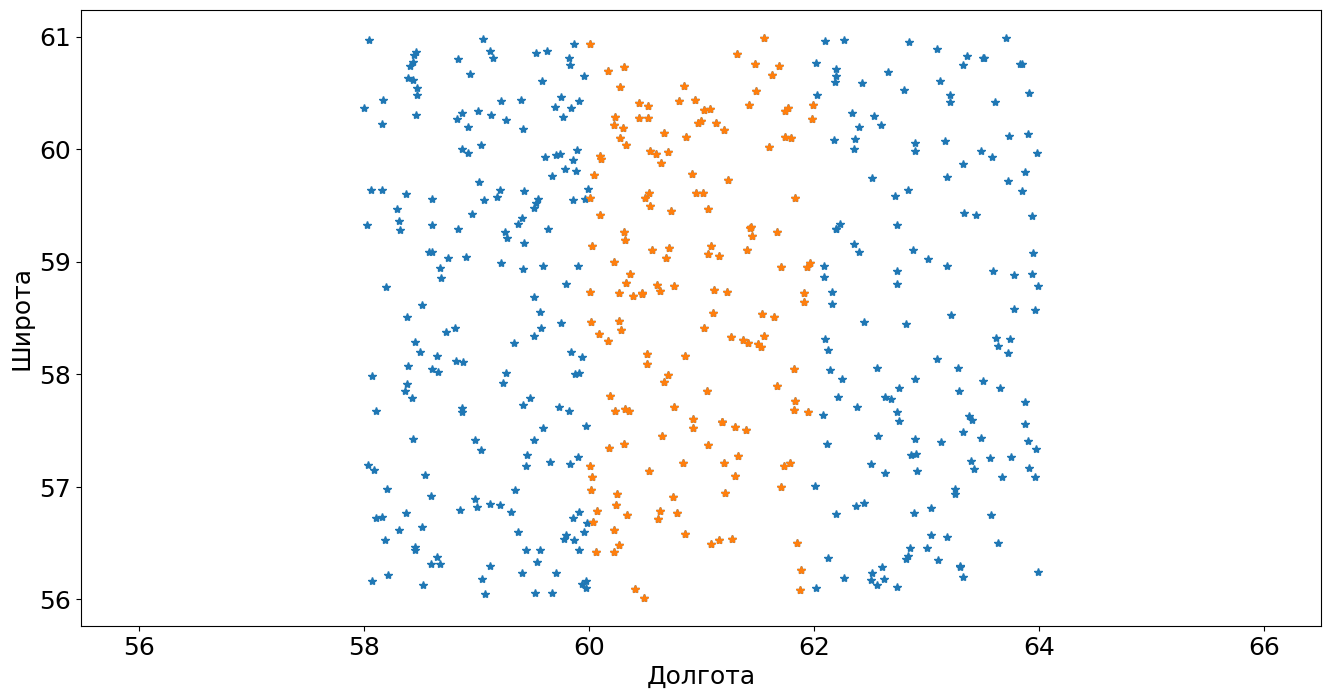

In [277]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

mask_lon = (lon > 60) & (lon < 62)


plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask_lon], lat[mask_lon], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

Если вы хотите применить две маски, их надо применять не последовательно, а находить поэлеметное `&`. Возьмем маски из двух последних примеров и применим их последовательно:

IndexError: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 500

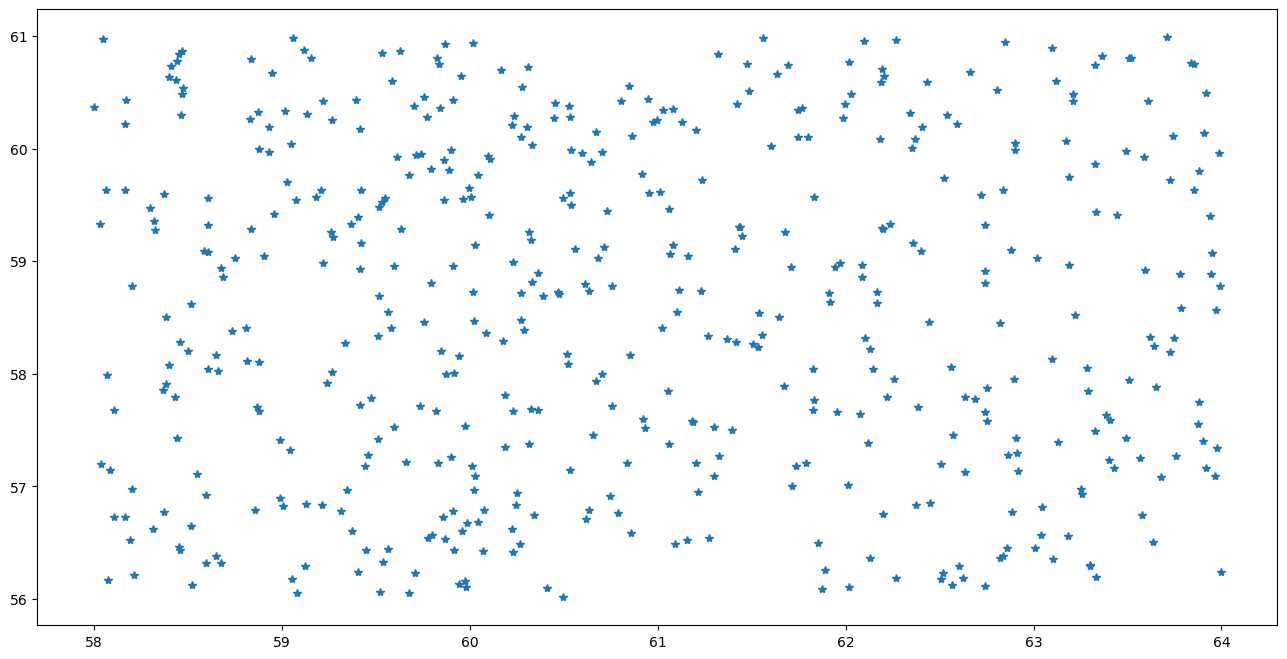

In [278]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

mask_lon = (lon > 60) & (lon < 62)
mask = np.sqrt((lat - 58.8)**2 + (lon - 60.6)**2) < 1

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask][mask_lon], lat[mask][mask_lon], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

## Продвинутое индексирование

Раз уж мы заговорили про индексирование масками, то обсудим и другие приколы, связанные с этим. Помните, мы сортивали один массив по другому? Есть хитрый способ это сделать в `numpy`. Возьмем данные в следующем виде:

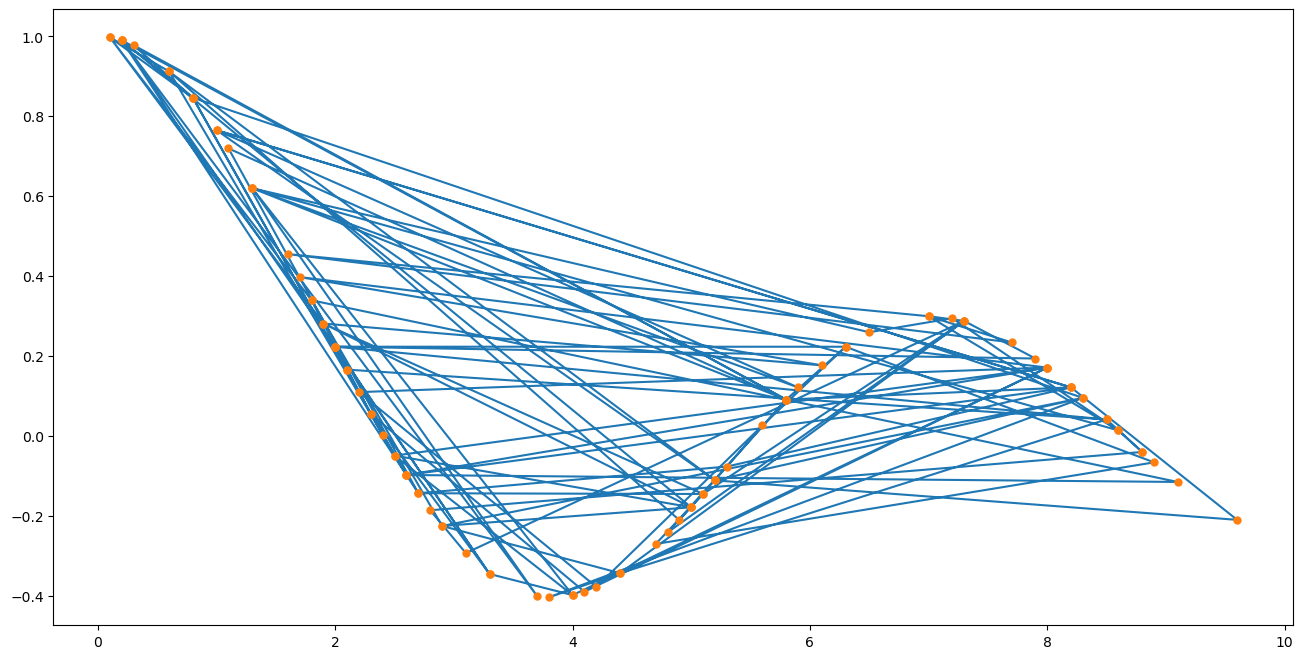

In [265]:
x, y = np.loadtxt('data/wtf.txt', unpack=True)

plt.figure(figsize=(16,8))
plt.plot(x, y, '-')
plt.plot(x, y, '.', markersize=10)
plt.show()

Наша проблема в том, что данные не упорядчены по возрастанию `x`. Для этого существует интересная функция:

In [266]:
sorted_indexes = np.argsort(x)
sorted_indexes

array([33, 79, 44,  8, 55, 74, 78, 60, 80, 73, 43, 12, 16, 20, 46, 18,  4,
       50, 30, 34, 39, 32, 93, 68, 86,  7, 64, 65, 38, 28, 69, 66, 42, 96,
       72, 41, 77, 99,  9, 21, 89, 35, 57, 90,  6, 67, 45, 82, 97,  5, 70,
       27, 83, 36, 23, 53, 61, 56, 94, 95, 92, 22, 59, 13, 10, 26, 75, 54,
       62, 19, 17, 31, 25, 63,  3, 48, 51,  2, 91, 84, 52, 49, 85, 71, 98,
       29, 76, 11, 15, 58, 81, 87, 37,  1, 47,  0, 88, 24, 40, 14])

Что произошло? Мы получили порядок, в котором нужно расставить элементы массива `x`, так чтобы значения росли по возрастанию. То есть первым нужно поставить элемент с индексом `33`, потом с индексом `79`, потом с индексом `44`и так далее. 


Если мы попробуем засунуть эти отсортированные индексы в квадратные скобки, то мы получим именно это: элементы массива `x` будут рассортированы согласно этому порядку: первым будет `33`-ий элемент, вторым `79`-ый и так далее. Посмотрим:

In [273]:
x[sorted_indexes]

array([0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.6, 0.6, 0.8, 0.8, 0.8, 1. , 1. ,
       1.1, 1.3, 1.3, 1.3, 1.6, 1.7, 1.8, 1.8, 1.9, 1.9, 2. , 2. , 2. ,
       2. , 2.1, 2.1, 2.2, 2.3, 2.3, 2.4, 2.5, 2.5, 2.6, 2.6, 2.6, 2.7,
       2.7, 2.8, 2.9, 2.9, 3.1, 3.3, 3.3, 3.7, 3.8, 4. , 4. , 4.1, 4.2,
       4.4, 4.4, 4.7, 4.8, 4.9, 5. , 5. , 5. , 5.1, 5.1, 5.2, 5.2, 5.3,
       5.6, 5.8, 5.8, 5.8, 5.8, 5.9, 6.1, 6.3, 6.3, 6.5, 7. , 7. , 7.2,
       7.3, 7.3, 7.3, 7.7, 7.9, 8. , 8. , 8. , 8.2, 8.2, 8.2, 8.3, 8.3,
       8.5, 8.5, 8.6, 8.6, 8.8, 8.8, 8.9, 9.1, 9.6])

Так как `x` связаны, то это отсортирует и `x` и `y`:

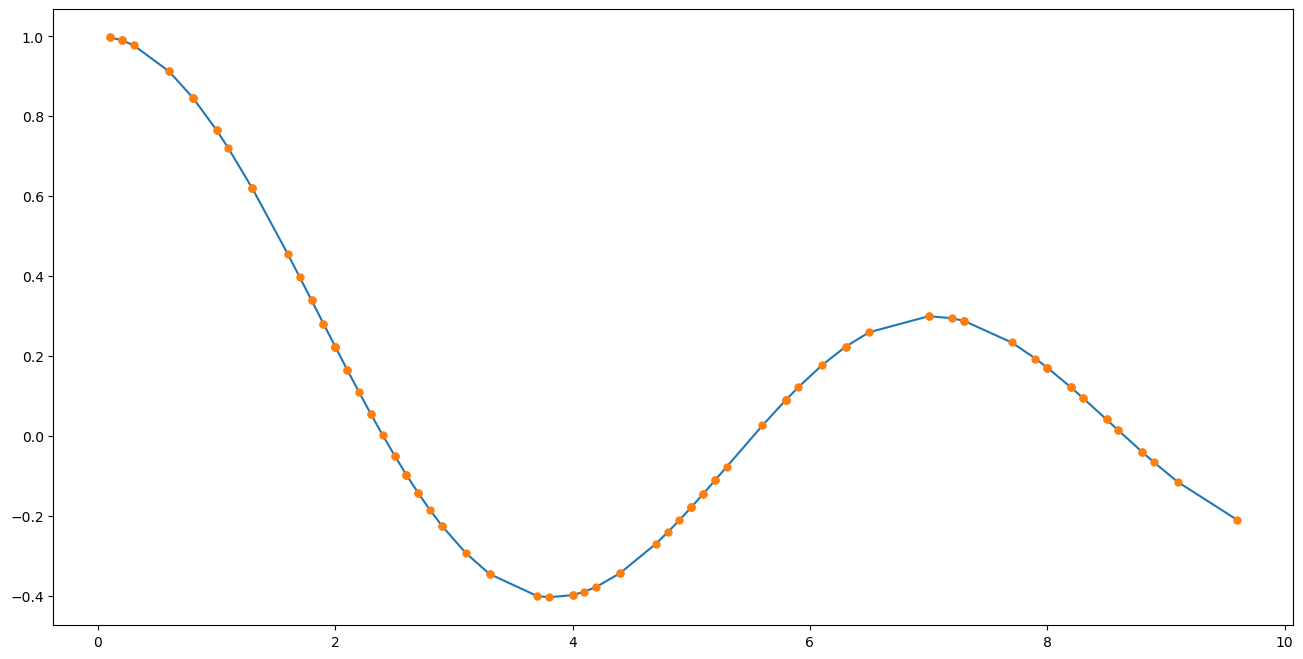

In [274]:
x, y = np.loadtxt('data/wtf.txt', unpack=True)

plt.figure(figsize=(16,8))
plt.plot(x[sorted_indexes], y[sorted_indexes], '-')
plt.plot(x[sorted_indexes], y[sorted_indexes], '.', markersize=10)
plt.show()